<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/Descendiendo_del_monte_Fuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Descendiendo del monte Fuji**

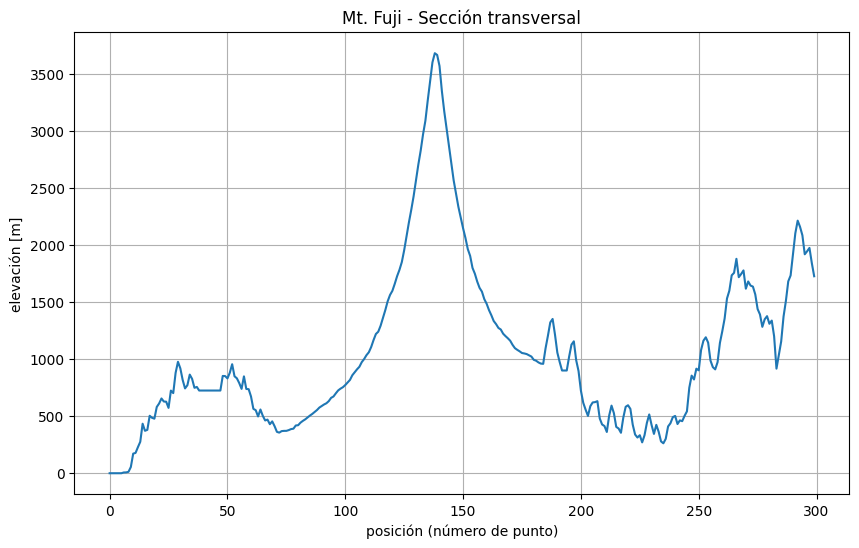

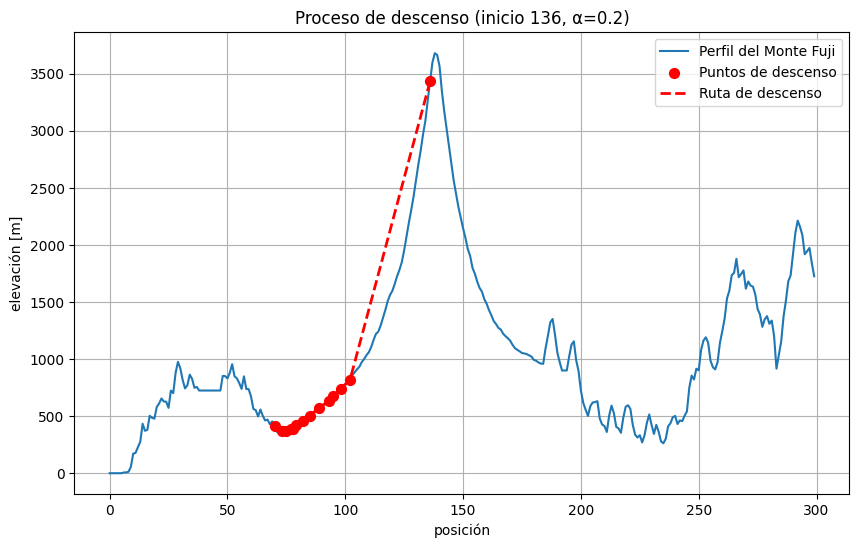

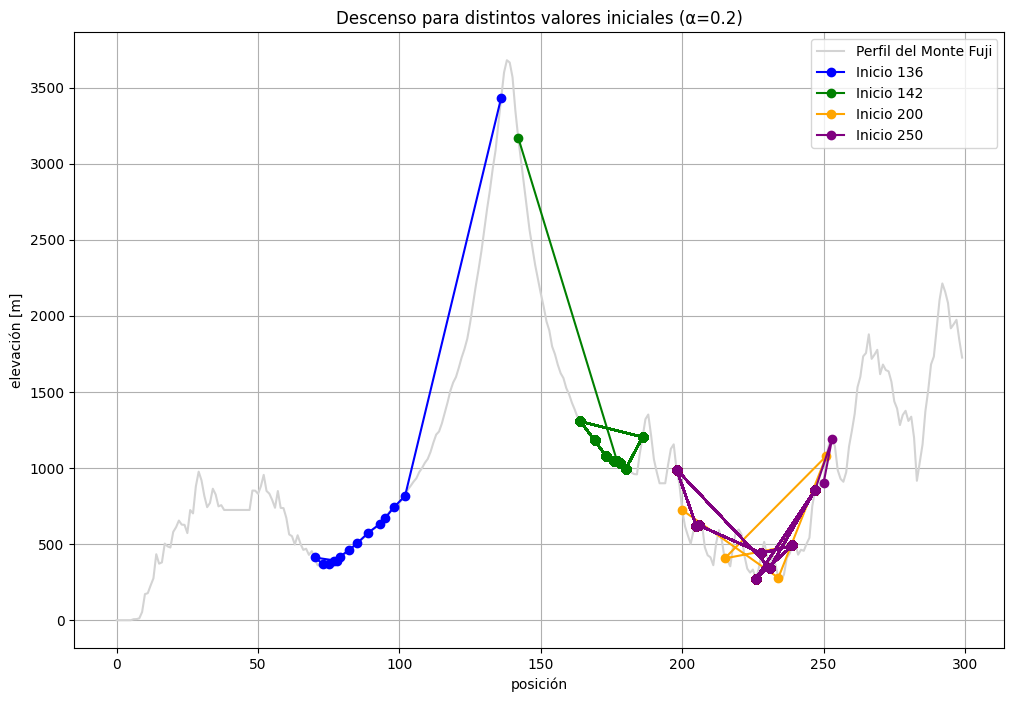

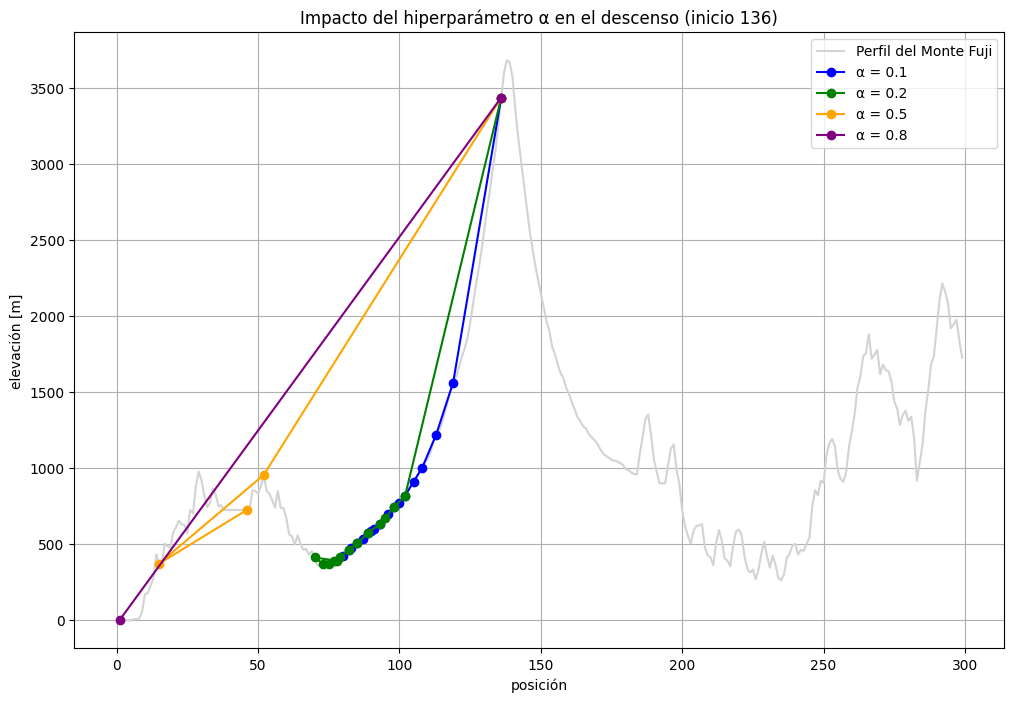

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # <-- FALTA EN TU CÓDIGO ORIGINAL

csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# --- P1 ---
position = fuji[:, 0].astype(int)   # número de punto (0..299)
elevation = fuji[:, 3]              # elevación [m]
plt.figure(figsize=(10, 6))
plt.plot(position, elevation)
plt.title("Mt. Fuji - Sección transversal")
plt.xlabel("posición (número de punto)")
plt.ylabel("elevación [m]")
plt.grid(True)
plt.show()

# --- P2 ---
def compute_slope(current_position, elevation_data):
    """Pendiente usando número de punto como x (Δy/Δx con Δx=1)."""
    i = int(current_position)
    if i <= 0:
        return 0.0
    dy = elevation_data[i] - elevation_data[i - 1]
    dx = 1.0
    return dy / dx

# --- P3 ---
def compute_destination(current_position, elevation_data, alpha=0.2):
    """Siguiente punto: x' = x - α * grad(x), redondeado y acotado al rango válido."""
    i = int(current_position)
    slope = compute_slope(i, elevation_data)
    next_pos = i - alpha * slope
    # acotar a [0, n-1]
    nmax = len(elevation_data) - 1
    next_pos = int(np.round(np.clip(next_pos, 0, nmax)))
    return next_pos

# --- P4 ---
def descend_fuji(start_position, elevation_data, alpha=0.2, max_steps=2000):
    path = [int(start_position)]
    cur = int(start_position)
    for _ in range(max_steps):
        nxt = compute_destination(cur, elevation_data, alpha)
        if nxt == cur:  # sin movimiento → llegamos a un mínimo (con redondeo)
            break
        path.append(nxt)
        cur = nxt
    return path

descent_path = descend_fuji(136, elevation, alpha=0.2)

# --- P5 ---
plt.figure(figsize=(10, 6))
plt.plot(position, elevation, label='Perfil del Monte Fuji')
path_elev = elevation[descent_path]
plt.scatter(descent_path, path_elev, color='red', s=50, zorder=5, label='Puntos de descenso')
plt.plot(descent_path, path_elev, color='red', linestyle='--', linewidth=2, label='Ruta de descenso')
plt.title("Proceso de descenso (inicio 136, α=0.2)")
plt.xlabel("posición")
plt.ylabel("elevación [m]")
plt.legend()
plt.grid(True)
plt.show()

# --- P6 ---
all_descent_paths = {start: descend_fuji(start, elevation, alpha=0.2)
                     for start in range(len(elevation))}

# --- P7 ---
start_positions_to_plot = [136, 142, 200, 250]
plt.figure(figsize=(12, 8))
plt.plot(position, elevation, color='lightgray', label='Perfil del Monte Fuji')

colors = ['blue', 'green', 'orange', 'purple']
for c, start in zip(colors, start_positions_to_plot):
    path = all_descent_paths[start]
    plt.plot(path, elevation[path], marker='o', color=c, label=f'Inicio {start}')
plt.title("Descenso para distintos valores iniciales (α=0.2)")
plt.xlabel("posición")
plt.ylabel("elevación [m]")
plt.legend()
plt.grid(True)
plt.show()

# --- P8 ---
start_position = 136
alphas_to_test = [0.1, 0.2, 0.5, 0.8]

plt.figure(figsize=(12, 8))
plt.plot(position, elevation, color='lightgray', label='Perfil del Monte Fuji')
for c, a in zip(colors, alphas_to_test):
    path = descend_fuji(start_position, elevation, alpha=a)
    plt.plot(path, elevation[path], marker='o', color=c, label=f'α = {a}')
plt.title("Impacto del hiperparámetro α en el descenso (inicio 136)")
plt.xlabel("posición")
plt.ylabel("elevación [m]")
plt.legend()
plt.grid(True)
plt.show()
